# MATH 210 Introduction to Mathematical Computing

## April 4, 2022

* Polynomial interpolation
* General interpolation
* Regression (curves of best fit)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Polynomial interpolation

Find the unique polynomial of degree 4 which interpolates the data

$$
(-2,4) \ , \ (0,1) \ , \ (1,1) \ , \ (3,-1) \ , \ (5,4)
$$

In [2]:
t = [-2,0,1,3,5]
y = [4,1,1,-1,4]
A = np.vander(t,increasing=True)
A

array([[  1,  -2,   4,  -8,  16],
       [  1,   0,   0,   0,   0],
       [  1,   1,   1,   1,   1],
       [  1,   3,   9,  27,  81],
       [  1,   5,  25, 125, 625]])

In [3]:
c = la.solve(A,y)
c

array([ 1.        ,  0.18333333,  0.04166667, -0.28333333,  0.05833333])

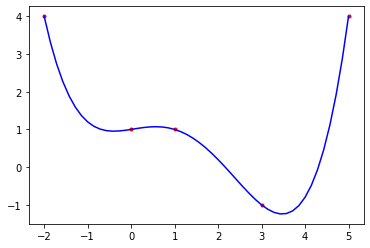

In [4]:
T = np.linspace(-2,5,50)
Y = sum([c[n]*T**n for n in range(0,len(c))])
plt.plot(t,y,'r.',T,Y,'b')
plt.show()

## General interpolation

Consider $d+1$ points $(t_0,y_0),(t_1,y_1),\dots,(t_d,y_d)$ such that $t_i \ne t_j$ ($i \ne j$). Let $f_0(t),f_1(t),\dots,f_d(t)$ be $d+1$ linearly independent functions. There exists a unique function of the form

$$
F(t) = c_0 f_0(t) + c_1 f_1(t) + \cdots + c_d f_d(t)
$$

such that $F(t_n) = y_n$ for $n=0,\dots,d$. Note that if $f_0(t)=1$, $f_1(t)=t$,$\dots$,$f_d(t)=t^d$, then this is the usual polynomial interpolation.

Each point gives an equation

\begin{align*}
c_0 f_0(t_0) + c_1 f_1(t_0) + \cdots + c_d f_d(t_0) &= y_0 \\
c_0 f_0(t_1) + c_1 f_1(t_1) + \cdots + c_d f_d(t_1) &= y_1 \\
& \vdots \\
c_0 f_0(t_d) + c_1 f_1(t_d) + \cdots + c_d f_d(t_d) &= y_d
\end{align*}

Therefore the coefficients $c_0,\dots,c_d$ of the unique function $F(t)$ are the solution of the system $A \mathbf{c} = \mathbf{y}$ where

$$
A = \begin{bmatrix}
f_0(t_0) & f_1(t_0) & \cdots & f_d(t_0) \\
f_0(t_1) & f_1(t_1) & \cdots & f_d(t_1) \\
\vdots & \vdots & \ddots & \vdots \\
f_0(t_d) & f_1(t_d) & \cdots & f_d(t_d)
\end{bmatrix}
\hspace{15mm}
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_d \end{bmatrix}
\hspace{15mm}
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_d \end{bmatrix}
$$

## Example

Find the unique function of the form

$$
F(t) = c_0 + c_1 \sin(t) + c_2 \cos(t) + c_3 \sin(2t) + c_4 \cos(2t)
$$

which interpolates the data

$$
(-2,4) \ , \ (0,1) \ , \ (1,1) \ , \ (3,-1) \ , \ (5,4)
$$

Let $f_0(t) = 1$, $f_1(t) = \sin(t)$, $f_2(t) = \cos(t)$, $f_3(t) = \sin(2t)$, $f_4(t) = \cos(2t)$.

In [5]:
t = np.array([-2,0,1,3,5])
y = np.array([4,1,1,-1,4])
a0 = np.ones(5)
a1 = np.sin(t)
a2 = np.cos(t)
a3 = np.sin(2*t)
a4 = np.cos(2*t)
A = np.column_stack((a0,a1,a2,a3,a4))
A

array([[ 1.        , -0.90929743, -0.41614684,  0.7568025 , -0.65364362],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  1.        ],
       [ 1.        ,  0.84147098,  0.54030231,  0.90929743, -0.41614684],
       [ 1.        ,  0.14112001, -0.9899925 , -0.2794155 ,  0.96017029],
       [ 1.        , -0.95892427,  0.28366219, -0.54402111, -0.83907153]])

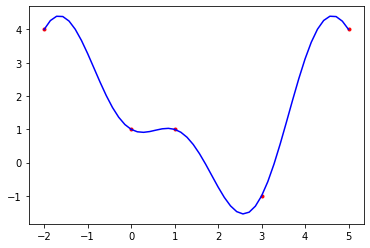

In [6]:
c = la.solve(A,y)
T = np.linspace(-2,5,50)
Y = c[0] + c[1]*np.sin(T) + c[2]*np.cos(T) + c[3]*np.sin(2*T) + c[4]*np.cos(2*T)
plt.plot(t,y,'r.',T,Y,'b')
plt.show()

## Lines of best fit

Consider $d+1$ points $(t_0,y_0),\dots,(t_d,y_d)$. Find the line $y = c_0 + c_1 t$ which best fits the data in the sense that it minimizes the sum of squared errors

$$
SSE = \sum_{n=0}^d (y_n - (c_0 - c_1 t_n))^2
$$

The coefficents $c_0$ and $c_1$ are the solution of the normal equations $A^T A \mathbf{c} = A^T \mathbf{y}$ where

$$
A = \begin{bmatrix} 1 & t_0 \\ 1 & t_1 \\ \vdots & \vdots \\ 1 & t_d \\ \end{bmatrix}
$$

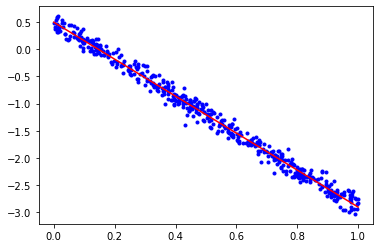

In [7]:
N = 500
t = np.random.rand(N)
y = 0.5 - 3.4*t + 0.1*np.random.randn(N)
A = np.column_stack((np.ones(N),t))
c = la.solve(A.T@A,A.T@y)
T = np.linspace(0,1,50)
Y = c[0] + c[1]*T
plt.plot(t,y,'b.',T,Y,'r')
plt.show()